In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
Feature_cols=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]
X= df[Feature_cols]
y= df.target

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=2)

In [10]:
from sklearn.ensemble import AdaBoostClassifier
x= AdaBoostClassifier(n_estimators=50, learning_rate=1)

In [11]:
x=x.fit(X_train,y_train)
y_pred=x.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9777777777777777


In [13]:
from sklearn.svm import SVC
s=SVC()
s= s.fit(X_train, y_train)
y_predi=s.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predi))

0.9777777777777777


<Figure size 600x600 with 0 Axes>

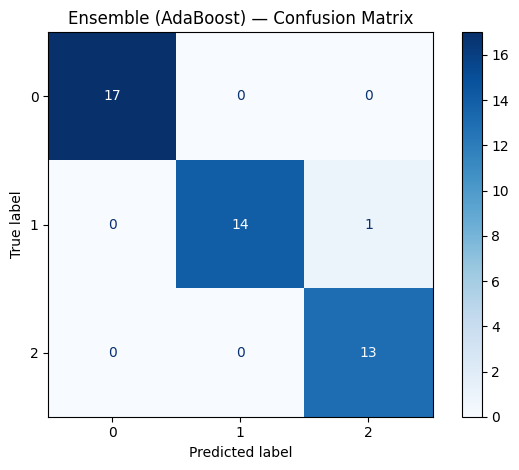

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# If y_pred already exists for AdaBoost, you can reuse it; otherwise:
y_pred = x.predict(X_test)  # x is your AdaBoostClassifier

plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.title("Ensemble (AdaBoost) — Confusion Matrix")
plt.tight_layout()
plt.savefig("ensemble_confusion_matrix.png", dpi=200)
plt.show()


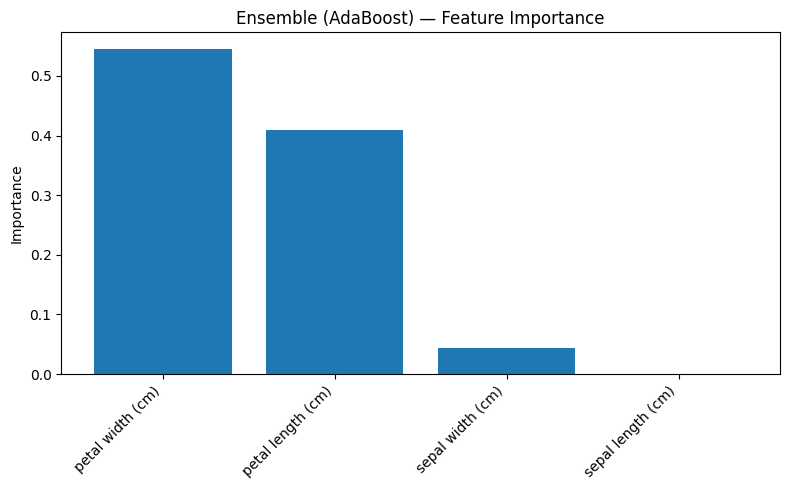

In [16]:
import numpy as np
import matplotlib.pyplot as plt

importances = x.feature_importances_     # from AdaBoost
indices = np.argsort(importances)[::-1]  # sort high → low
feat_names = X_train.columns if hasattr(X_train, "columns") else np.array(["f1","f2","f3","f4"])

plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feat_names[indices], rotation=45, ha="right")
plt.ylabel("Importance")
plt.title("Ensemble (AdaBoost) — Feature Importance")
plt.tight_layout()
plt.savefig("ensemble_feature_importance.png", dpi=200)
plt.show()


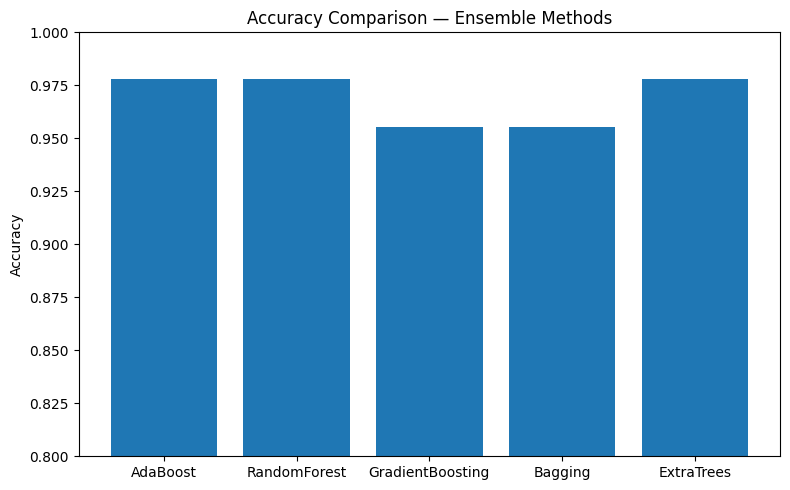

{'AdaBoost': 0.9777777777777777,
 'RandomForest': 0.9777777777777777,
 'GradientBoosting': 0.9555555555555556,
 'Bagging': 0.9555555555555556,
 'ExtraTrees': 0.9777777777777777}

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

models = {
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=300, random_state=42),
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, preds)

plt.figure(figsize=(8,5))
plt.bar(list(accuracies.keys()), list(accuracies.values()))
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison — Ensemble Methods")
plt.tight_layout()
plt.savefig("ensemble_accuracy_comparison.png", dpi=200)
plt.show()

accuracies  # also print the dict so you can see exact numbers


In [18]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=200, random_state=42)),
        ("gb", GradientBoostingClassifier(random_state=42)),
        ("ada", AdaBoostClassifier(n_estimators=50, random_state=42)),
    ],
    voting="hard"
)
vc.fit(X_train, y_train)
vc_acc = accuracy_score(y_test, vc.predict(X_test))
print("VotingClassifier accuracy:", vc_acc)


VotingClassifier accuracy: 0.9777777777777777
